These exercises use the tips dataset in Seaborn to explore various visualization techniques. The dataset contains restaurant tip data with columns: `total_bill`, `tip`, `sex`, `smoker`, `day`, `time`, and `size`. For each exercise, load the dataset using `sns.load_dataset('tips')` and create the specified plot. Refer to the Seaborn documentation (https://seaborn.pydata.org/) for details on functions and parameters.

In [160]:
import seaborn as sns
import matplotlib.pyplot as plt
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### **Exercise 1: Bar Plot**

**Task:** Create a bar plot showing the average tip amount for each day of the week. Use different colors for each day and add error bars to show the confidence interval.<br>
**Instructions:** Use `sns.barplot()`. Check the documentation for the `hue` and `ci` parameters to customize colors and error bars. Add a title and label the axes.<br>
**Hint:** Group the data by `day` and compute the mean `tip`.

C:\Users\da170\AppData\Local\Temp\ipykernel_17820\3196469569.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=tips, x="day", y="tip", hue="day", ci = 95, palette="viridis")


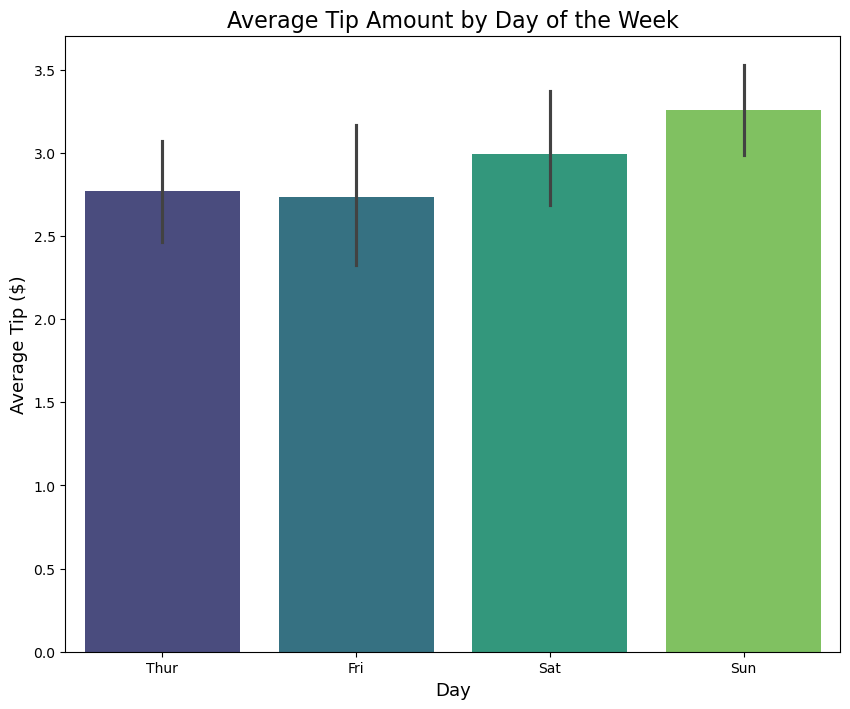

In [161]:
#==================================================================================================================================================
# ci = 95  --> Show 95% confidence interval 

#================================================================================================== 
plt.figure(figsize=(10, 8))
#=============================================== Seaborn Plot ===============================================
#sns.barplot(data=tips, x="day", y="tip", hue="day", errorbar=('ci', 95 ), palette="viridis")

sns.barplot(data=tips, x="day", y="tip", hue="day", ci = 95, palette="viridis")

#===============================================Title and Labels=============================================
plt.title("Average Tip Amount by Day of the Week", fontsize=16)
plt.xlabel("Day", fontsize=13)
plt.ylabel("Average Tip ($)", fontsize=13)
#===============================================Show=============================================== 
plt.show()
#================================================================================================== 

### **Exercise 2: Histogram**

**Task**: Plot a histogram of the total bill amounts, with separate histograms for male and female customers overlaid on the same plot. Use different colors and transparency for clarity.  
**Instructions**: Use `sns.histplot()`. Explore the `hue` parameter to differentiate by `sex` and set `alpha` for transparency. Read the documentation to adjust the number of bins (`bins`). Set a title and axis labels.  
**Hint**: Use `element='step'` for a cleaner overlay of histograms.

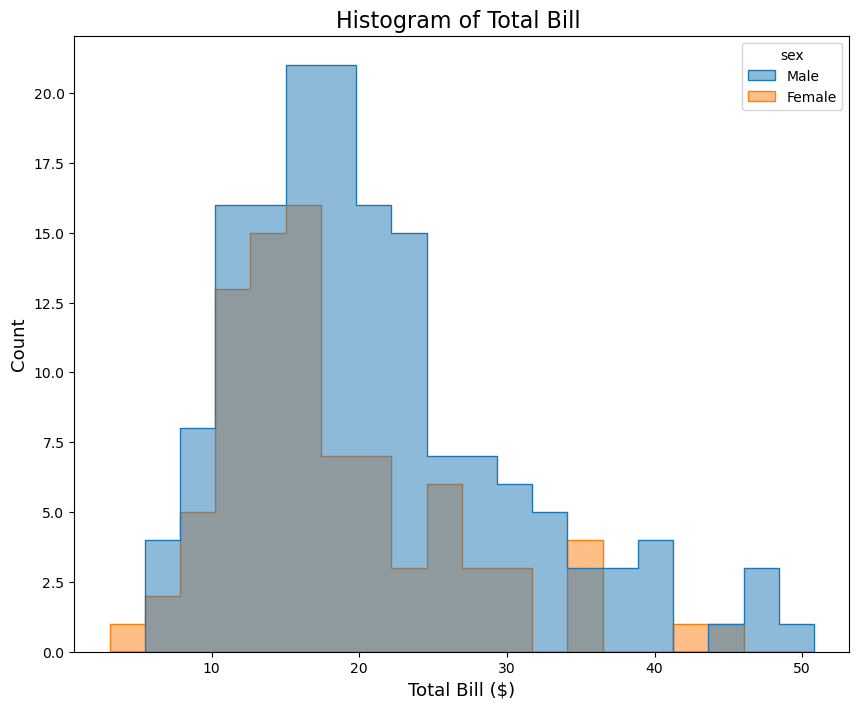

In [162]:
#==================================================================================================================================================
# element = "step"     --> Shows bars as steps (no fill) instead of solid bars.
# bins = 20            --> Set number of bins in histogram

#================================================================================================== 
plt.figure(figsize=(10, 8))

#=============================================== Seaborn Plot ===============================================
sns.histplot(data=tips,x="total_bill",hue="sex",element="step", bins=20, alpha=0.5 )

#===============================================Title and Labels=============================================
plt.title("Histogram of Total Bill ", fontsize=16)
plt.xlabel("Total Bill ($)", fontsize=13)
plt.ylabel("Count", fontsize=13)

#===============================================Show=============================================== 
plt.show()
#================================================================================================== 

### **Exercise 3: Pie Chart**

**Task**: Create a pie chart showing the proportion of customers by party size (`size`). Each slice should represent a unique party size, with percentages displayed.  
**Instructions**: Seaborn doesn’t have a direct pie chart function, so use `matplotlib.pyplot.pie()` with data aggregated from the tips dataset. Compute the count of each `size` using `value_counts()`. Customize the chart with colors and labels; refer to Matplotlib’s pie chart documentation for `autopct`.  
**Hint**: Use `tips['size'].value_counts()` to get the data and pass it to `plt.pie()`.

In [163]:
size_counts = tips['size'].value_counts().sort_index()
size_counts

size
1      4
2    156
3     38
4     37
5      5
6      4
Name: count, dtype: int64

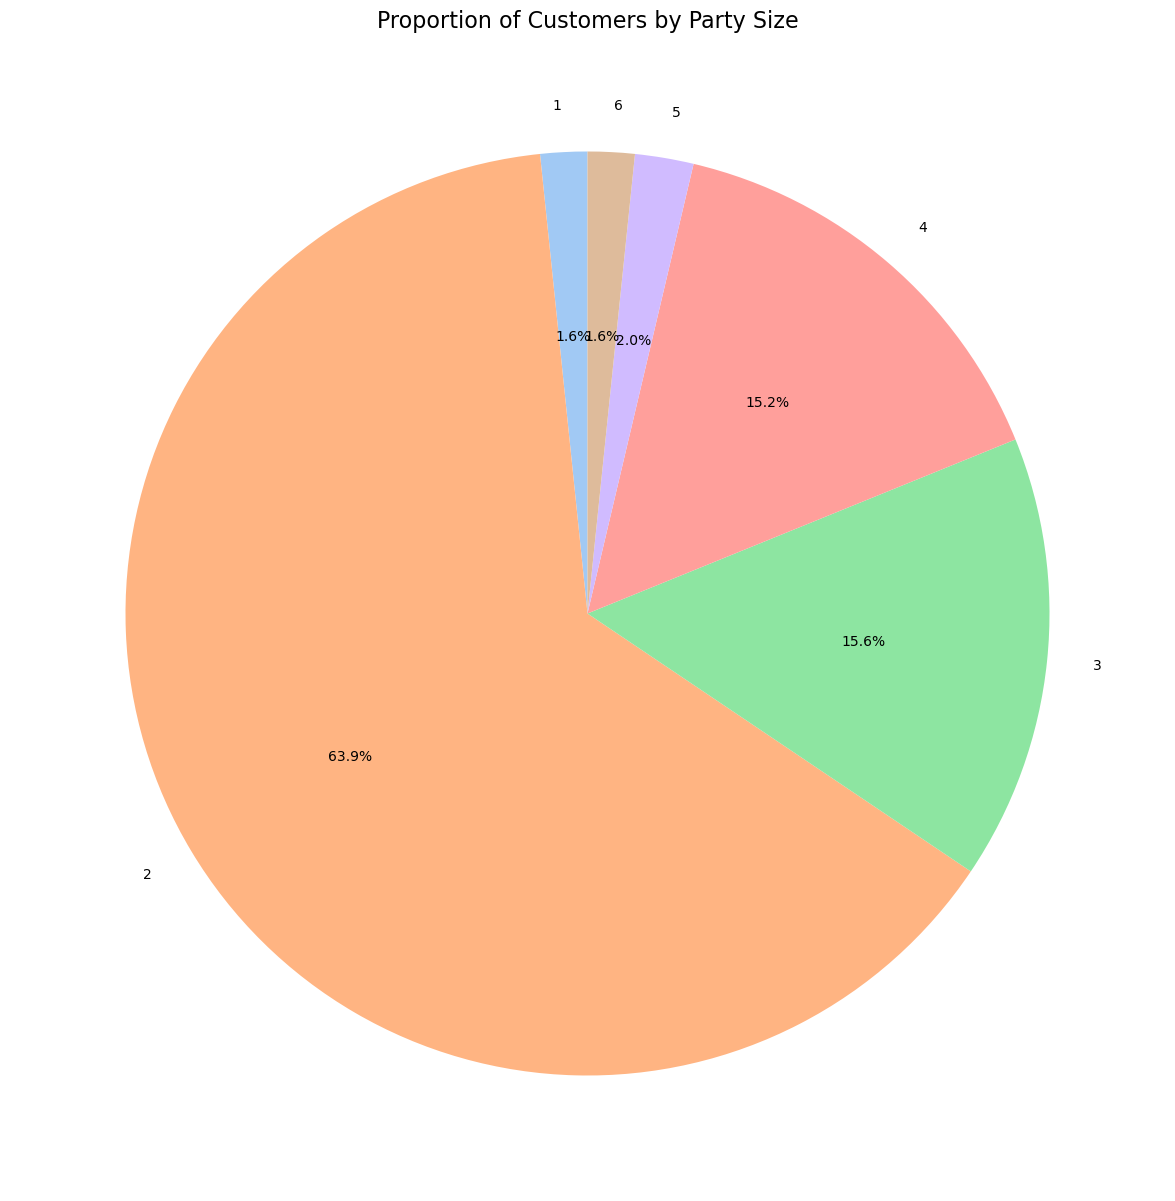

In [164]:
#==================================================================================================================================================
# autopct = '%.1f%%'     --> Show percentage in pie chart 
# startangle = 90        --> Rotate start angle of pie chart

#================================================================================================== 
plt.figure(figsize=(15, 15))
#=============================================== Seaborn Plot ===============================================

plt.pie( size_counts, labels=size_counts.index, autopct='%.1f%%', startangle=90, colors=sns.color_palette("pastel") )

#===============================================Title and Labels=============================================
plt.title("Proportion of Customers by Party Size", fontsize=16)

#===============================================Show=============================================== 
plt.show()
#================================================================================================== 

### **Exercise 4: Scatter Plot**

**Task**: Create a scatter plot of `total_bill` (x-axis) vs. `tip` (y-axis), with points colored by `smoker` status and sized by party `size`.  
**Instructions**: Use `sns.scatterplot()`. Check the documentation for `hue` and `size` parameters to encode additional variables. Add a title, axis labels, and a legend.  
**Hint**: Adjust the `sizes` parameter to control the range of point sizes (e.g., `sizes=(20, 200)`).

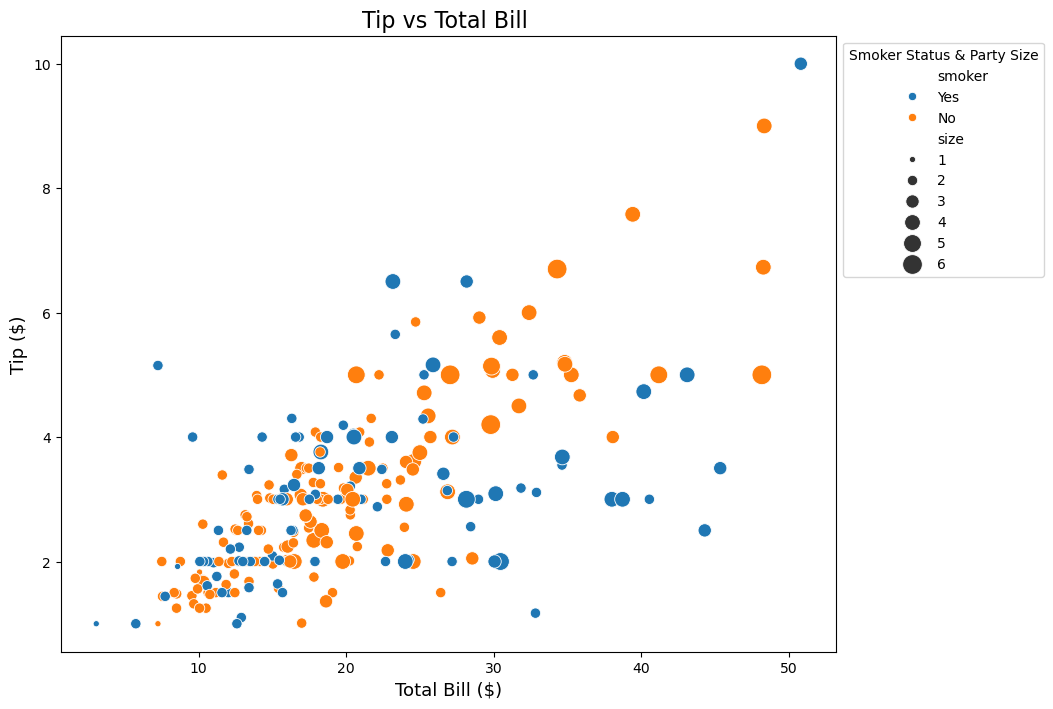

In [165]:
#==================================================================================================================================================
# size = "size"      -->  Column name 
# sizes = (20, 200)  -->  Minimum and maximum size for points

#================================================================================================== 
plt.figure(figsize=(10, 8))

#=============================================== Seaborn Plot ===============================================
sns.scatterplot(data=tips,x="total_bill", y="tip",hue="smoker",size="size", sizes=(20, 200) )

#===============================================Title and Labels=============================================
plt.title("Tip vs Total Bill ", fontsize=16)
plt.xlabel("Total Bill ($)", fontsize=13)
plt.ylabel("Tip ($)", fontsize=13)

#===============================================legend=============================================
# Position the legend outside the plot area
plt.legend(title="Smoker Status & Party Size", bbox_to_anchor=(1, 1) )
#===============================================Show=============================================== 
plt.show()
#================================================================================================== 

### **Exercise 5: Line Plot**

**Task**: Plot the average tip amount over different party sizes, with separate lines for lunch and dinner (`time`). Include confidence intervals as shaded areas.  
**Instructions**: Use `sns.lineplot()`. Read the documentation to use `hue` for `time` and enable confidence intervals with `ci='sd'`. Group the data by `size` and `time` to compute mean `tip`. Add a title and labels.  
**Hint**: The x-axis should represent `size` (1 to 6), and the y-axis should show mean `tip`.

In [166]:

######################################################################################################
# ===================>>>> Group the data by size and time to compute mean tip <<<< ===================
# grouped = tips.groupby(['size', 'time'])['tip'].mean().reset_index()
# sns.lineplot(data=grouped, x='size', y='tip', hue='time', ci='sd', marker='o')
######################################################################################################
# ===================>>>> Not a good idea <<<< ===================
# Grouping the data first means we only keep the average tip
# This removes the full data, so sns.lineplot can't show confidence intervals (the shaded area)
######################################################################################################

C:\Users\da170\AppData\Local\Temp\ipykernel_17820\1081666957.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data=tips, x='size', y='tip', hue='time', ci='sd', marker='o')


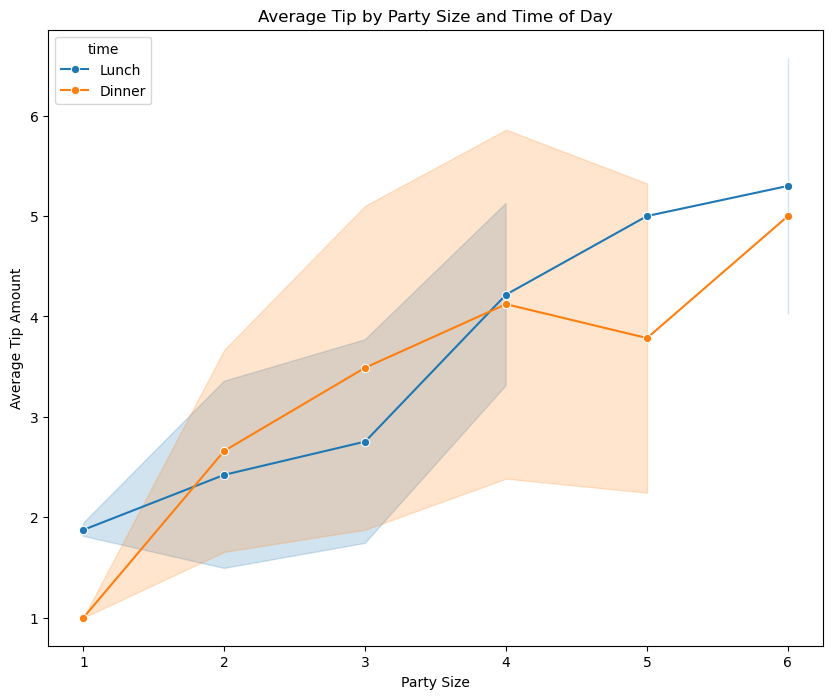

In [167]:
#==================================================================================================================================================
# ci='sd' --> Use standard deviation instead of confidence interval

#================================================================================================== 
plt.figure(figsize=(10, 8))
#=============================================== Seaborn Plot ===============================================
#sns.lineplot(data=tips, x='size', y='tip', hue='time', errorbar='sd', marker='o')

sns.lineplot(data=tips, x='size', y='tip', hue='time', ci='sd', marker='o')

#===============================================Title and Labels=============================================
plt.title('Average Tip by Party Size and Time of Day')
plt.xlabel('Party Size')
plt.ylabel('Average Tip Amount')

# Set x-axis ticks from 1 to 6
plt.xticks(range(1, 7))  
#===============================================Show=============================================== 
plt.show()
#================================================================================================== 

### **Exercise 6: Catplot**

**Task**: Create a categorical plot to compare tip amounts across days, with separate subplots for `smoker` status. Use box plots to show the distribution of tips.  
**Instructions**: Use `sns.catplot()`. Explore the documentation for the `kind` parameter (set `kind='box'`) and `col` to create subplots by `smoker`. Set `x='day'`, `y='tip'`. Add a title to the figure using `fig.suptitle()`.  
**Hint**: Check how to adjust the figure size in `catplot` with `height` and `aspect`.

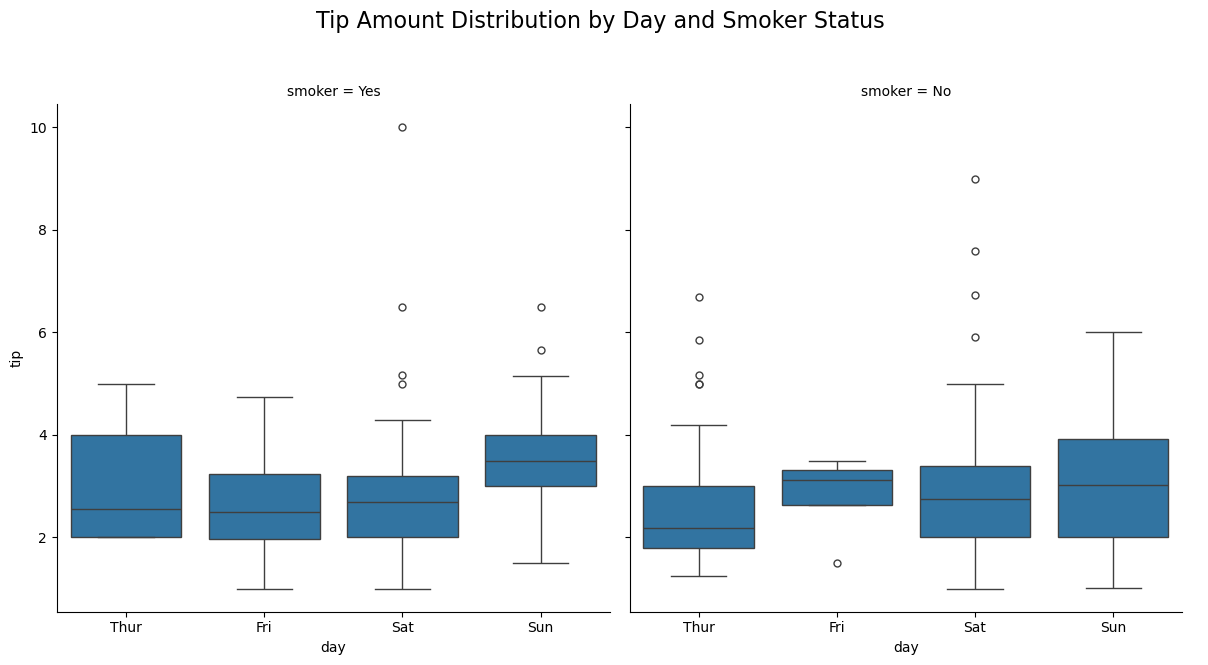

In [168]:
#==================================================================================================================================================
# sns.catplot() --> Used for categorical plots (bar, box, etc.)

#=============================================== Seaborn Plot ===============================================
catplot_grid = sns.catplot( data=tips,x='day',y='tip',col='smoker', kind='box',height=6, aspect=1 )

#===============================================Title and Labels=============================================
catplot_grid.fig.suptitle('Tip Amount Distribution by Day and Smoker Status', y=1.1 , fontsize=16)

#===============================================Show=============================================== 
plt.show()
#================================================================================================== 

### **Exercise 7: Relplot**

**Task**: Create a relational plot showing `total_bill` vs. `tip`, with subplots for each `day` and points colored by `sex`. Use different markers for male and female customers.  
**Instructions**: Use `sns.relplot()`. Refer to the documentation for `col` to split by `day`, `hue` for `sex`, and `style` for different markers. Add a title and ensure the legend is clear.  
**Hint**: Use `col_wrap=2` to arrange subplots in a 2-column grid.

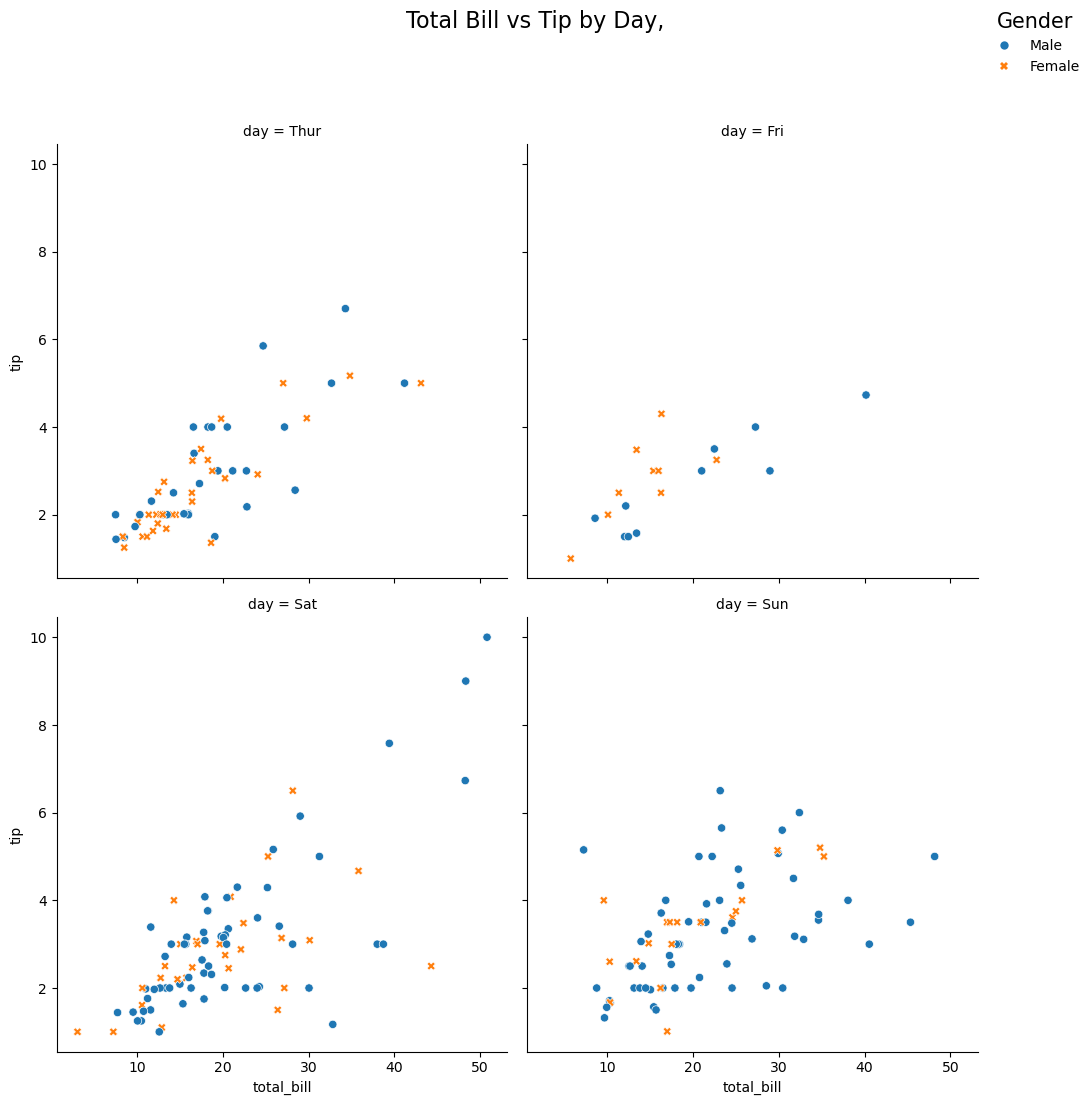

In [169]:
#==================================================================================================================================================
# sns.relplot() --> Used for relationship plots (scatterplot, lineplot)
# col_wrap = 2  --> Start a new row after 2 columns in the plot grid 
# style = 'sex' --> Change point style based on gender

#=============================================== Seaborn Plot ===============================================
relplot_grid = sns.relplot(data=tips,x='total_bill',y='tip',col='day', kind='scatter', hue='sex', style='sex', height=5,aspect=1, col_wrap=2)

#===============================================Title and Labels=============================================
#plt.suptitle('Total Bill vs Tip by Day, ', y=1.1 , fontsize=16)
relplot_grid.fig.suptitle('Total Bill vs Tip by Day, ', y=1.1 , fontsize=16)

#===============================================legend=============================================
relplot_grid._legend.set_title("Gender" ) 
relplot_grid._legend.get_title().set_fontsize(15)
relplot_grid._legend.set_loc('upper right') 
#===============================================Show=============================================== 
plt.show()
#================================================================================================== 

### **Exercise 8: Displot**

**Task**: Create a distribution plot of tip amounts, showing histograms and kernel density estimates (KDE) for lunch and dinner (`time`) in separate subplots.  
**Instructions**: Use `sns.displot()`. Check the documentation for `kind='hist'`, `kde=True`, and `col` to split by `time`. Set `x='tip'` and use `hue='time'` for coloring. Add a title and labels.  
**Hint**: Experiment with `bins` and `kde_kws` to customize the KDE smoothness.

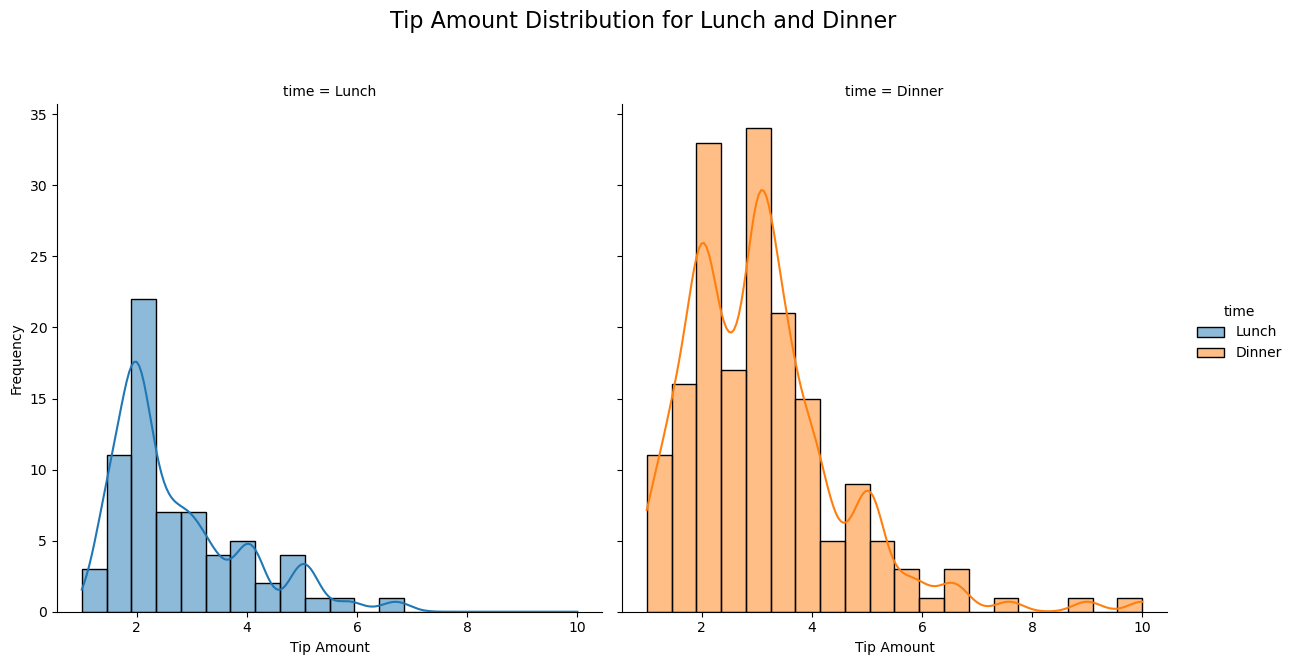

In [170]:
#==================================================================================================================================================
# sns.displot()                --> Used for distribution plots (hist, kde)
# kde = True                   --> Show Kernel Density Estimate (KDE) curve
# kde_kws = {'bw_adjust': 0.5} --> Bandwidth adjustment for smoother or sharper KDE

#=============================================== Seaborn Plot ===============================================
displot_grid = sns.displot(data=tips,x='tip',hue='time',col='time',kind='hist',bins=20,kde=True,kde_kws={'bw_adjust': 0.5 } , height=6,aspect=1)

#===============================================Title and Labels=============================================

displot_grid.fig.suptitle('Tip Amount Distribution for Lunch and Dinner', y=1.1 , fontsize=16)


displot_grid.axes[0][0].set_xlabel("Tip Amount")
displot_grid.axes[0][0].set_ylabel("Frequency")
displot_grid.axes[0][1].set_ylabel("")
displot_grid.axes[0][1].set_xlabel("Tip Amount")
#===============================================Show=============================================== 
plt.show()
#================================================================================================== 




### **Exercise 9: FacetGrid**

**Task**: Use FacetGrid to create a grid of scatter plots showing `total_bill` vs. `tip`, with rows for `smoker` and columns for `time`. Add a regression line to each subplot.  
**Instructions**: Use `sns.FacetGrid()`. Read the documentation to set up the grid with `row='smoker'` and `col='time'`. Map `sns.scatterplot` and `sns.regplot` to each facet. Add a title to the figure.  
**Hint**: Use `map_dataframe()` to apply plotting functions and set `scatter_kws` for point styling.

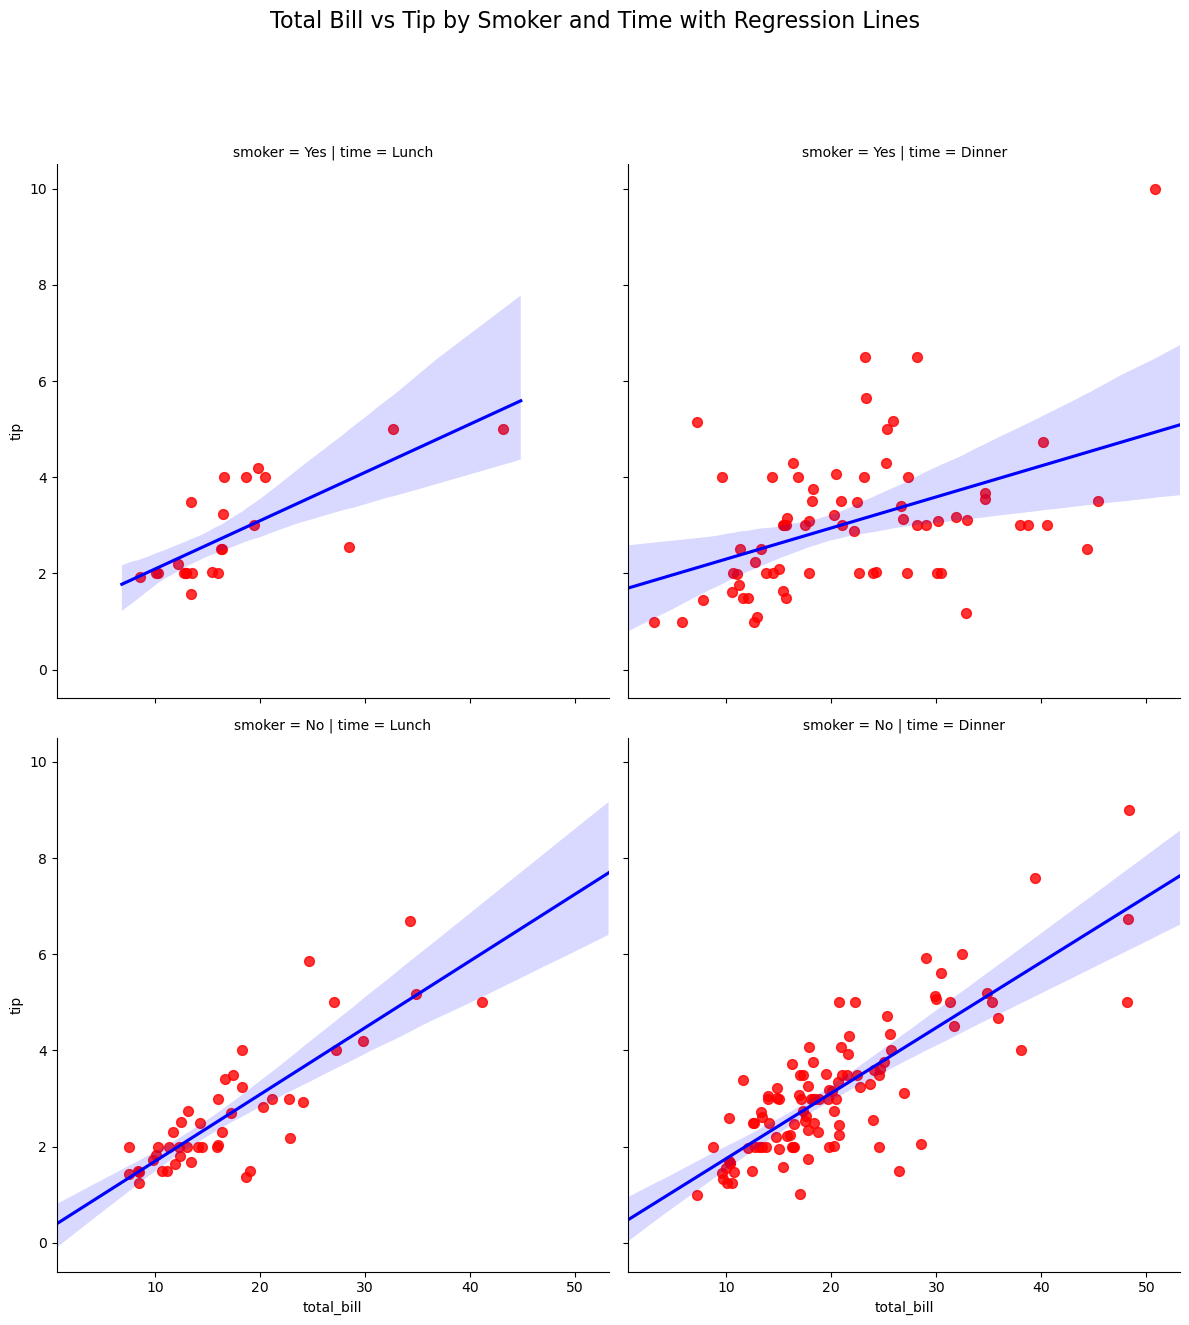

In [171]:
#==================================================================================================================================================
# sns.FacetGrid()                                        --> Create multiple subplots by group
# fig.map_dataframe()                                    --> Applies a plotting function to each subplot in a FacetGrid.
# truncate = False                                       --> the regression line across the full x-axis range
# scatter = True                                         --> show scatter points in regplot
# scatter_kws = {'s': 50, 'alpha': 0.8, 'color': 'red'}  --> Style for scatter points in regplot
# line_kws = {'color': 'blue'}                           --> Style for regression line in regplot

#=============================================== Seaborn Plot ===============================================
facet_grid  = sns.FacetGrid(tips, row='smoker', col='time', height=6, aspect=1)

#fig.map_dataframe(sns.scatterplot, x='total_bill', y='tip', color="red" , s=50, alpha=0.8)
#fig.map_dataframe(sns.regplot    , x='total_bill', y='tip', scatter=False , truncate = False, color="blue")
# = 
facet_grid.map_dataframe(sns.regplot,x='total_bill',y='tip'
                         ,truncate = False , line_kws={'color': 'blue'}
                         ,scatter=True ,scatter_kws={'s': 50, 'alpha': 0.8 , 'color': 'red'} ) 

#===============================================Title and Labels=============================================
facet_grid.fig.suptitle('Total Bill vs Tip by Smoker and Time with Regression Lines', y=1.1 , fontsize=16)

#===============================================Show=============================================== 
plt.show()
#================================================================================================== 

### **Exercise 10: Regression Plot**

**Task**: Create a regression plot of `total_bill` vs. `tip`, with a linear fit and confidence intervals. Add a second plot with a polynomial regression (degree 2) for comparison.  
**Instructions**: Use `sns.lmplot()` for the linear fit. Check the documentation for `order=2` to create the polynomial fit in a separate `lmplot`. Set `x='total_bill'`, `y='tip'`, and use `hue='smoker'` to differentiate smokers and non-smokers. Add titles and labels.  
**Hint**: Use `ci=95` for confidence intervals and `scatter_kws` to adjust point appearance.

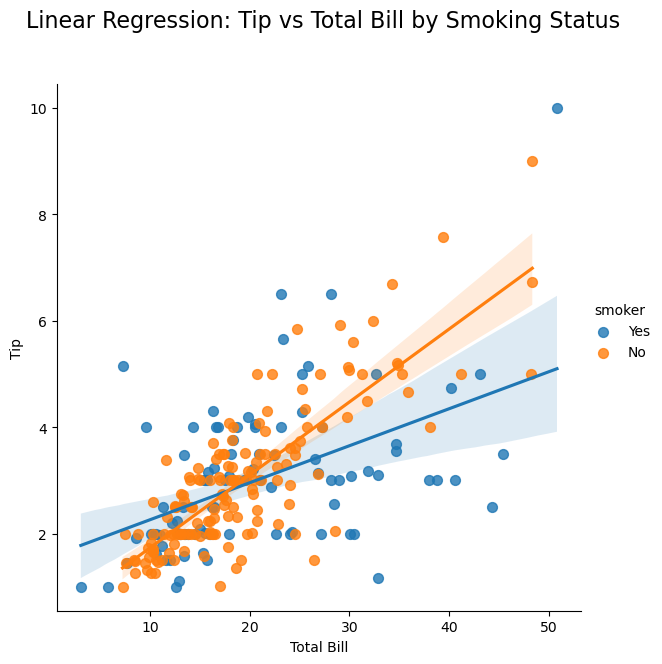

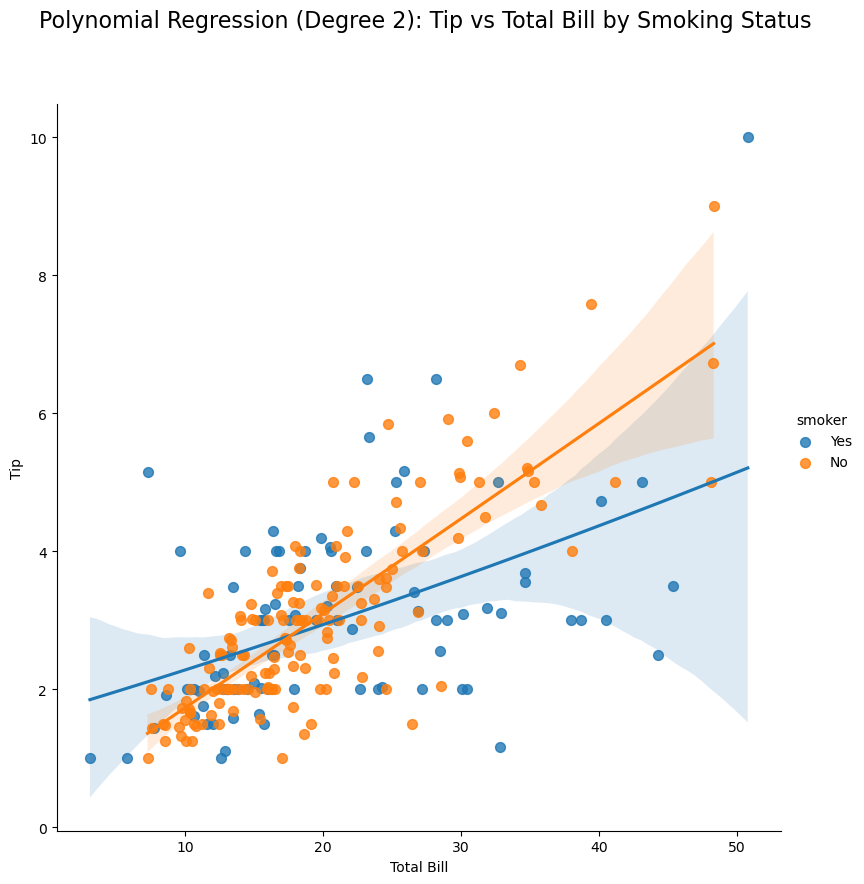

In [172]:
#===============================================================================================================================================
# sns.lmplot()  --> Scatterplot with regression line (linear or polynomial)


#################################################################### Linear Regression #########################################################
#=============================================== Seaborn Plot ===============================================
linear_reg_plot  = sns.lmplot(data=tips,x='total_bill',y='tip',hue='smoker',ci=95,scatter_kws={'s': 50, 'alpha': 0.8},height=6,aspect=1)
#===============================================Title and Labels=============================================

linear_reg_plot .fig.suptitle("Linear Regression: Tip vs Total Bill by Smoking Status", y=1.1, fontsize=16)
linear_reg_plot .set_axis_labels("Total Bill", "Tip")
#################################################################### Polynomial Regression (Degree 2) ###########################################
#=============================================== Seaborn Plot ===============================================
polynomial_reg_plot  = sns.lmplot(data=tips,x='total_bill',y='tip',hue='smoker',ci=95,scatter_kws={'s': 50, 'alpha': 0.8},height=8,aspect=1 
                                  , order=2)

#===============================================Title and Labels=============================================
polynomial_reg_plot.fig.suptitle("Polynomial Regression (Degree 2): Tip vs Total Bill by Smoking Status", y=1.1, fontsize=16)
polynomial_reg_plot.set_axis_labels("Total Bill", "Tip")

#===============================================Show=============================================== 
plt.show()
#================================================================================================== 